In [0]:
import tensorflow as tf
import os
import shutil
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
 # import dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2020-06-07 07:44:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  23.5MB/s    in 14s     

2020-06-07 07:44:26 (21.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# ekstrasi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'

os.mkdir(os.path.join(base_dir, 'train'))
os.mkdir(os.path.join(base_dir, 'val'))

In [6]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'rock',
 'scissors',
 'paper',
 'README_rpc-cv-images.txt',
 'val',
 'train']

In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# path direktori rock paper scissors
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

# path direktori rock paper scissors pada direktori train
rock_train_dir = os.path.join(train_dir, 'rock')
scissors_train_dir = os.path.join(train_dir, 'scissors')
paper_train_dir = os.path.join(train_dir, 'paper')

# path direktori rock paper scissors pada direktori val
rock_val_dir = os.path.join(val_dir, 'rock')
scissors_val_dir = os.path.join(val_dir, 'scissors')
paper_val_dir = os.path.join(val_dir, 'paper')

#----------------------------------------------------------

# menyalin direktori rock, train, scissor ke direktori train
shutil.copytree(rock_dir, rock_train_dir)
shutil.copytree(scissors_dir, scissors_train_dir)
shutil.copytree(paper_dir, paper_train_dir)

# menyalin direktori rock, train, scissor ke direktori validation
shutil.copytree(rock_dir, rock_val_dir)
shutil.copytree(scissors_dir, scissors_val_dir)
shutil.copytree(paper_dir, paper_val_dir)

'/tmp/rockpaperscissors/val/paper'

In [8]:
# mengecek file apa saja yang ada di direktori train
os.listdir('/tmp/rockpaperscissors/train')

['rock', 'scissors', 'paper']

In [11]:
# mengecek file apa saja yang ada di direktori validation
os.listdir('/tmp/rockpaperscissors/val')

['rock', 'scissors', 'paper']

In [0]:
# proses augmentasi gambar
train_datagen = ImageDataGenerator(
    validation_split=0.3,
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    validation_split=0.3,
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [137]:
# mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
    directory = base_dir, # direktori data latih
    target_size = (150, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    subset='training',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    base_dir, # direktori data validasi
    target_size = (150, 150), #mengubah resolusi seluruh gambar
    batch_size = 4,
    subset='validation',
    class_mode='categorical'
)

Found 6129 images belonging to 6 classes.
Found 2623 images belonging to 6 classes.


In [0]:
# membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [0]:
# mencompile dan menentukan loss function serta optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [117]:
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=50,
    validation_data = validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, #berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/50
25/25 - 6s - loss: 1.1915 - accuracy: 0.3100 - val_loss: 1.0953 - val_accuracy: 0.3000
Epoch 2/50
25/25 - 6s - loss: 1.0879 - accuracy: 0.3800 - val_loss: 1.0628 - val_accuracy: 0.4000
Epoch 3/50
25/25 - 6s - loss: 1.0666 - accuracy: 0.4300 - val_loss: 0.9856 - val_accuracy: 0.6000
Epoch 4/50
25/25 - 6s - loss: 1.1025 - accuracy: 0.4500 - val_loss: 0.8897 - val_accuracy: 0.5500
Epoch 5/50
25/25 - 6s - loss: 0.7507 - accuracy: 0.6500 - val_loss: 1.1162 - val_accuracy: 0.6000
Epoch 6/50
25/25 - 6s - loss: 0.5181 - accuracy: 0.8000 - val_loss: 0.1864 - val_accuracy: 0.9500
Epoch 7/50
25/25 - 6s - loss: 0.4346 - accuracy: 0.8500 - val_loss: 0.4533 - val_accuracy: 0.8000
Epoch 8/50
25/25 - 6s - loss: 0.4988 - accuracy: 0.8400 - val_loss: 0.4481 - val_accuracy: 0.9000
Epoch 9/50
25/25 - 6s - loss: 0.4364 - accuracy: 0.8500 - val_loss: 0.5666 - val_accuracy: 0.7500
Epoch 10/50
25/25 - 6s - loss: 0.3635 - accuracy: 0.9000 - val_loss: 0.1981 - val_accuracy: 0.9500
Epoch 11/50
25/25 -

Saving 0t08v9bAaA0mXGCQ.png to 0t08v9bAaA0mXGCQ (12).png
[[1. 0. 0.]]


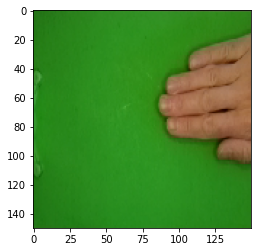

In [109]:
# prediksi gambar

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)
  predict = np.argmax(classes)
  print(predict)

  # if classes==True:
  #   print('paper')
    